In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import models

import pandas as pd
import numpy as np
import os
import encoders
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Dataset
categories = ['Democrat', 'Republican']
tweetsdf = pd.read_csv('democratvsrepublicantweets/ExtractedTweets.csv')
handlesdf = pd.read_csv('democratvsrepublicantweets/TwitterHandles.csv')
raw_tweets = tweetsdf['Tweet']
normalized_tweets = raw_tweets.str.upper()
char_to_int, int_to_char = encoders.create_encoder_decoder(normalized_tweets.str.cat())
parties = tweetsdf['Party']
y = 1.0 - np.asarray(parties == 'Democrat')
max_tweet_len = normalized_tweets.str.len().max()
X = encoders.encode_strings(normalized_tweets, char_to_int, max_tweet_len)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
filepath, model = models.model6(len(char_to_int) + 1, max_tweet_len)
if filepath in os.listdir():
    model.load_weights(filepath)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 166)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 166, 32)           16832     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 280       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 17,118
Trainable params: 17,118
Non-trainable params: 0
_________________________________________________________________


In [4]:
# models.train(X_train, y_train, model, filepath)

In [5]:
predictions = np.argmax(model.predict(X_test), axis=1)

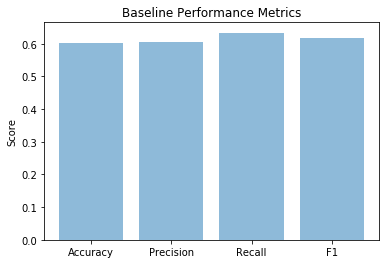

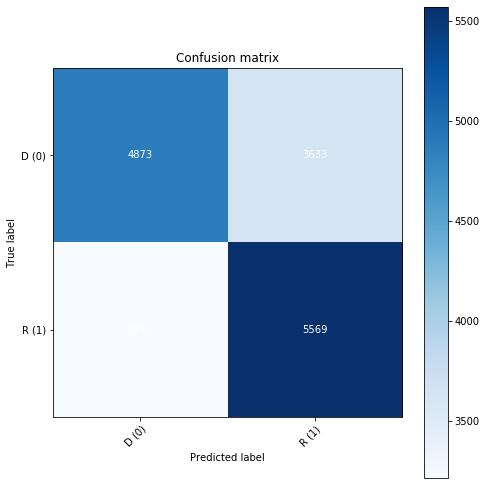

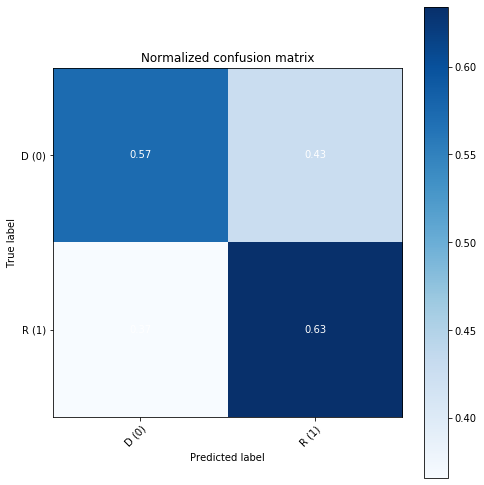

Accuracy: 0.6038630580615314
Precision: 0.6051945229297979
Recall: 0.6338493057136353
F1: 0.6191905714921059


In [6]:
metrics, confusion_matrix = models.plot_results(y_test, predictions)
(accuracy, precision, recall, f1) = metrics
print('Accuracy: %s' % accuracy)
print('Precision: %s' % precision)
print('Recall: %s' % recall)
print('F1: %s' % f1)

In [7]:
metrics

[0.6038630580615314,
 0.6051945229297979,
 0.6338493057136353,
 0.6191905714921059]